<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/The_Rise_of_LLMs_From_Tradition_to_Attention_xp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LLMs (Large Language Models) are advanced artificial intelligence systems trained to understand and generate human language. They are called "large" because they’re trained on massive amounts of text data — like books, articles, websites — and use billions (or even trillions) of parameters to model language patterns.

In [2]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
# 2. Loading a pretrained model and tokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "gpt2"  # זה שם המודל שניקח מה-huggingface
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



In [14]:
text = "Artificial intelligence will shape the future of humanity."


In [15]:
from transformers import AutoTokenizer

# נטען את ה-tokenizer של GPT-2
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# נבצע טוקניזציה
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)


In [16]:
print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")


Original Text: Artificial intelligence will shape the future of humanity.
Tokens: ['Art', 'ificial', 'Ġintelligence', 'Ġwill', 'Ġshape', 'Ġthe', 'Ġfuture', 'Ġof', 'Ġhumanity', '.']
Token IDs: [8001, 9542, 4430, 481, 5485, 262, 2003, 286, 9265, 13]


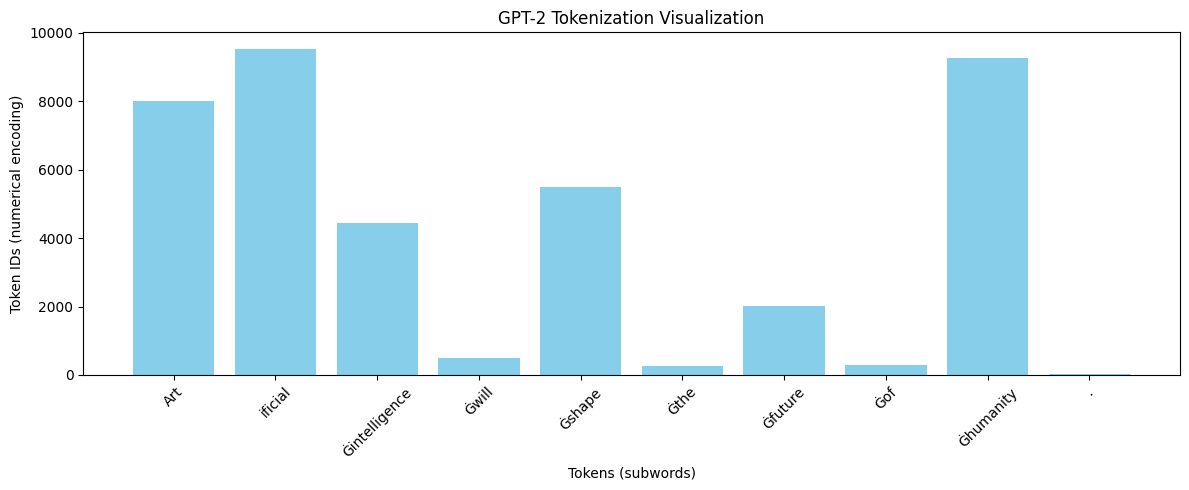

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel("Tokens (subwords)")
plt.ylabel("Token IDs (numerical encoding)")
plt.title("GPT-2 Tokenization Visualization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
for token, token_id in zip(tokens, token_ids):
    special = "← starts with space" if token.startswith("Ġ") else ""
    print(f"Token: {token:15} -> ID: {token_id:6} {special}")


Token: Art             -> ID:   8001 
Token: ificial         -> ID:   9542 
Token: Ġintelligence   -> ID:   4430 ← starts with space
Token: Ġwill           -> ID:    481 ← starts with space
Token: Ġshape          -> ID:   5485 ← starts with space
Token: Ġthe            -> ID:    262 ← starts with space
Token: Ġfuture         -> ID:   2003 ← starts with space
Token: Ġof             -> ID:    286 ← starts with space
Token: Ġhumanity       -> ID:   9265 ← starts with space
Token: .               -> ID:     13 


In [11]:
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)


In [12]:
for token, token_id in zip(tokens, token_ids):
    print(f"Token: {token:>15} | ID: {token_id}")


Token:           Large | ID: 21968
Token:       Ġlanguage | ID: 3303
Token:         Ġmodels | ID: 4981
Token:            Ġare | ID: 389
Token:   Ġtransforming | ID: 25449
Token:            Ġthe | ID: 262
Token:          Ġworld | ID: 995
Token:               . | ID: 13


# Summary: Tokenization and Special Prefixes in GPT-2

# Tokenization is the process of splitting text into smaller units called tokens.
# These tokens can be whole words or subwords, depending on the model's vocabulary.

# In GPT-2, tokens that begin with a space in the original text start with the special character 'Ġ'.
# This helps the model understand where new words begin.

# Each token is then converted into a unique number called a Token ID, which the model uses as input.

# This process allows the model to handle complex and unknown words by breaking them into known subword pieces.


# Exercise 4: Pretraining vs. Fine-Tuning

# Pretraining:
# This is the first phase of training a large language model like GPT-2.
# In this phase, the model learns general language patterns from a large corpus of text (e.g., books, Wikipedia, news).
# It is trained to predict the next word in a sentence, which helps it learn grammar, facts, and context.

# Fine-Tuning:
# After pretraining, the model can be fine-tuned for specific tasks (e.g., sentiment analysis, legal text generation).
# In fine-tuning, we train the model on a smaller, task-specific dataset.
# This allows the model to adapt its general knowledge to perform well in a targeted application.

# In short:
# Pretraining = Learning general language
# Fine-Tuning = Adapting to a specific task

In [21]:
# מגדירים את ה־prompt (התחלה של טקסט)
input_text = "Once upon a time in a small village"

# משתמשים בטוקניזר שהגדרנו קודם כדי להפוך את הטקסט למספרים (ID של טוקנים)
input_ids = tokenizer.encode(input_text, return_tensors="pt")  # pt = PyTorch tensor

# נותנים למודל לנסות להמשיך את הטקסט
output_ids = model.generate(
    input_ids,
    max_length=50,        # אורך מקסימלי של הטקסט הסופי
    num_return_sequences=1,  # כמה גרסאות שונות שיחזיר
    no_repeat_ngram_size=2,  # לא לחזור על אותן מילים/צירופים
)

# הופכים את המספרים בחזרה למילים
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# מציגים את מה שיצא
print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: Once upon a time in a small village
Generated Output: Once upon a time in a small village, a young girl named Nana was kidnapped by a group of bandits. She was taken to a village where she was forced to work as a prostitute. The bandits took her to the village of Kain,
